# Installing packages and Setup

In [38]:
!pip install -q -U sentence-transformers datasets peft bitsandbytes huggingface_hub accelerate
!pip install -q scispacy spacy=3.7.2 pyarrow<15,>=2  fastapi kaleido python-multipart uvicorn

/bin/bash: line 1: 15,: No such file or directory


In [2]:
!pip install -q https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_core_sci_md-0.5.3.tar.gz
!pip install -q https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_core_sci_sm-0.5.3.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 MB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
# from google.colab import userdata
# userdata.get('HF_TOKEN')

# Load data from Drive and Create HuggingFace Datasets

In [4]:
# prompt: write code to walk through a folder to extract file names

import os

def walk_through_folder(folder_path):
  """
  Walks through a folder and extracts file names.

  Args:
    folder_path: The path to the folder.

  Returns:
    A list of file names in the folder.
  """

  file_names = []
  for root, _, files in os.walk(folder_path):
    for file_name in files:
      file_names.append(os.path.join(root, file_name))

  return file_names

# Example usage
folder_path = "/content/drive/MyDrive/malawi"
file_names = walk_through_folder(folder_path)
print(file_names)


['/content/drive/MyDrive/malawi/SampleSubmission.csv', '/content/drive/MyDrive/malawi/Train.csv', '/content/drive/MyDrive/malawi/Test.csv', '/content/drive/MyDrive/malawi/booklets/TG Booklet 1.xlsx', '/content/drive/MyDrive/malawi/booklets/TG Booklet 2.xlsx', '/content/drive/MyDrive/malawi/booklets/TG Booklet 3.xlsx', '/content/drive/MyDrive/malawi/booklets/TG Booklet 4.xlsx', '/content/drive/MyDrive/malawi/booklets/TG Booklet 5.xlsx', '/content/drive/MyDrive/malawi/booklets/TG Booklet 6.xlsx', '/content/drive/MyDrive/malawi/working/Test.csv']


In [5]:
# prompt: write a function that loads csv files and excel files into a pandas dataframe. Each file should have its own dataframe

import pandas as pd

def load_csv_and_excel_files(file_names):
  """
  Loads CSV and Excel files from a folder into separate Pandas DataFrames.

  Args:
    folder_path: The path to the folder containing the files.

  Returns:
    A dictionary where the keys are the file names (without extension) and the values are the corresponding Pandas DataFrames.
  """

  data_frames = {}
  for file_name in file_names:
    if file_name.endswith(".csv"):
      data_frames[os.path.splitext(file_name)[0].split('/')[-1]] = \
      pd.read_csv(file_name,
                  index_col=0,
                  skiprows= 1,
                  names=["ID","Question Text", "Question Answer","Reference Document", "Paragraph(s) Number", "Keywords"])
    elif file_name.endswith((".xlsx", ".xls")):
      file_name2 = os.path.splitext(file_name)[0]
      data_frames[file_name2.split('/')[-1]] = \
      pd.read_excel(file_name,
                    index_col=0,
                    header=None,
                     names=["index", file_name2.split('/')[-1]])

  return data_frames

# Example usage
data_frames = load_csv_and_excel_files(file_names)
for file_name, df in data_frames.items():
  print(f"Dataframe for file '{file_name}':")


Dataframe for file 'SampleSubmission':
Dataframe for file 'Train':
Dataframe for file 'Test':
Dataframe for file 'TG Booklet 1':
Dataframe for file 'TG Booklet 2':
Dataframe for file 'TG Booklet 3':
Dataframe for file 'TG Booklet 4':
Dataframe for file 'TG Booklet 5':
Dataframe for file 'TG Booklet 6':


In [6]:
# prompt: extract the dataframes from the data_frames dictionary variable and name the variables using the key you used

# Extract the dataframes from the data_frames dictionary variable
test_df = data_frames["Test"]
train_df = data_frames["Train"]
bk1_df = data_frames["TG Booklet 1"]
bk2_df = data_frames["TG Booklet 2"]
bk3_df = data_frames["TG Booklet 3"]
bk4_df = data_frames["TG Booklet 4"]
bk5_df = data_frames["TG Booklet 5"]
bk6_df = data_frames["TG Booklet 6"]

dfs = [train_df, test_df, bk1_df, bk2_df, bk3_df, bk4_df, bk5_df, bk6_df,]

In [7]:
train_df.head()

,Question Text,Question Answer,Reference Document,Paragraph(s) Number,Keywords
ID,,,,,
Q829,Compare the laboratory confirmation methods fo...,Chikungunya is confirmed using serological tes...,TG Booklet 6,"154, 166",Laboratory Confirmation For Chikungunya Vs. Di...
Q721,When should specimens be collected for Anthrax...,Specimens should be collected during the vesic...,TG Booklet 6,140,"Anthrax Specimen Collection: Timing, Preparati..."
Q464,Which key information should be recorded durin...,"During a register review, key information abou...",TG Booklet 3,439-440,"Register Review, Key Information, Suspected Ca..."
Q449,Why is the District log of suspected outbreaks...,The log includes information about response ac...,TG Booklet 3,412,"District Log, Response Activities, Steps Taken..."
Q6,What do Community based surveillance strategie...,Community-based surveillance strategies focus ...,TG Booklet 1,86,"Community-based Surveillance Strategies, Ident..."


In [8]:
test_df.head()

,Question Text,Question Answer,Reference Document,Paragraph(s) Number,Keywords
ID,,,,,
Q4,"What is the definition of ""unusual event""",NaN,NaN,NaN,NaN
Q5,What is Community Based Surveillance (CBS)?,NaN,NaN,NaN,NaN
Q9,What kind of training should members of VHC re...,NaN,NaN,NaN,NaN
Q10,What is indicator based surveillance (IBS)?,NaN,NaN,NaN,NaN
Q13,What is Case based surveillance?,NaN,NaN,NaN,NaN


In [9]:
bk1_df.head()

,TG Booklet 1
index,
1,Technical Guidelines for﷐INTEGRATED DISEASE SU...
2,THIRD EDITION
3,BOOKLET ONE: INTRODUCTION SECTION
4,￼
5,DECEMBER 2020


In [10]:
# prompt: check the shape of all the dataframes where variables start with bk as simple statements not loops

print(bk1_df.shape)
print(bk2_df.shape)
print(bk3_df.shape)
print(bk4_df.shape)
print(bk5_df.shape)
print(bk6_df.shape)


(695, 1)
(941, 1)
(2064, 1)
(740, 1)
(271, 1)
(515, 1)


In [11]:
from datasets import Dataset

train_ds = Dataset.from_dict(train_df.to_dict(), split="train")
test_ds = Dataset.from_dict(test_df.to_dict(), split="test")

In [12]:
train_ds

Dataset({
    features: ['Question Text', 'Question Answer', 'Reference Document', 'Paragraph(s) Number', 'Keywords'],
    num_rows: 748
})

In [13]:
test_ds

Dataset({
    features: ['Question Text', 'Question Answer', 'Reference Document', 'Paragraph(s) Number', 'Keywords'],
    num_rows: 499
})

In [14]:
# hf_ds = [train_ds, test_ds]
# for ds in hf_ds:
#   ds.push_to_hub("mcarthuradal/malawi", token=True)

# Preprocessing Data

In [15]:
import nltk
import spacy
import scispacy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
!python -m spacy download en_core_web_sm

nltk.download('punkt')
en = spacy.load('en_core_web_sm')


2024-02-13 00:14:19.516604: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 00:14:19.516673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 00:14:19.518243: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 00:14:21.716022: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.7.1
    Uninstalling en-core-web-sm-3.7.1:
      Successfully uninstall

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
# prompt: write a function in python to find the length of a sentence

def sentence_length(sentence: str) -> int:

  tokens = nltk.word_tokenize(sentence)
  # tokens = sentence.split()
  return len(tokens)


In [24]:
questions = train_df["Question Text"].map(sentence_length)
answers = train_df["Question Answer"].map(sentence_length)
keywords = train_df["Keywords"].map(sentence_length)

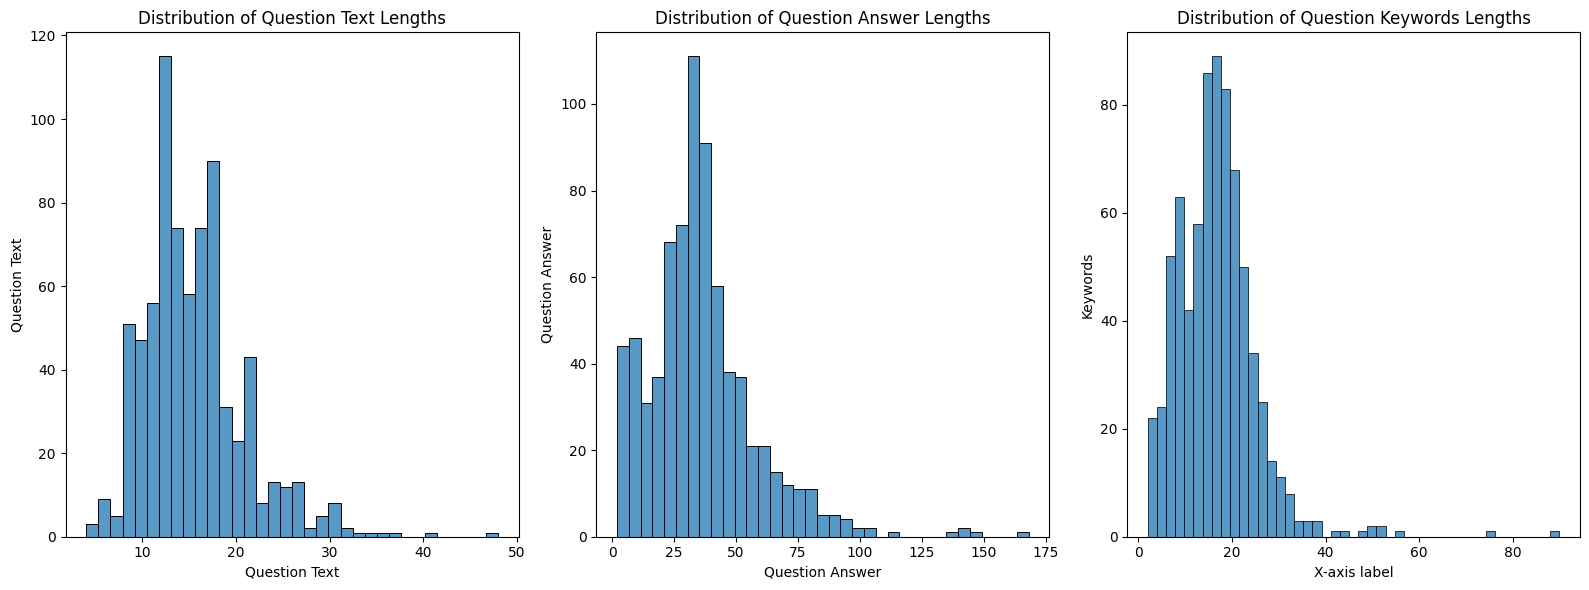

In [25]:
# prompt: generate a pyplot grid of 3 plots

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
# Plot your data on each axis
axes[2].set_xlabel("X-axis label")
sns.histplot(questions, ax=axes[0])
sns.histplot(answers, ax=axes[1])
sns.histplot(keywords, ax=axes[2])
# Set labels and titles for each plot
axes[0].set_ylabel("Question Text")
axes[0].set_title("Distribution of Question Text Lengths")
axes[1].set_ylabel("Question Answer")
axes[1].set_title("Distribution of Question Answer Lengths")
axes[2].set_ylabel("Keywords")
axes[2].set_title("Distribution of Question Keywords Lengths")
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()


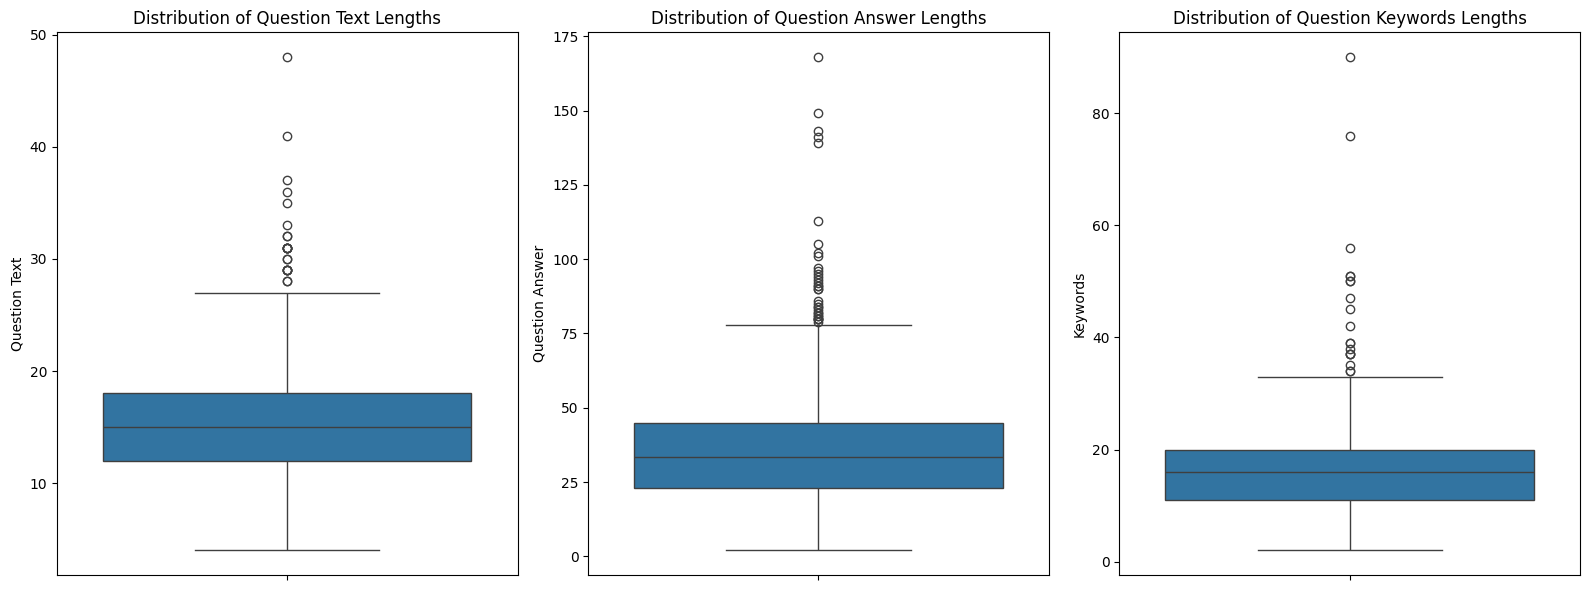

In [28]:
fig2, axes2 = plt.subplots(1, 3, figsize=(16, 6))
# Plot your data on each axis
axes[2].set_xlabel("X-axis label")
sns.boxplot(questions, ax=axes2[0])
sns.boxplot(answers, ax=axes2[1])
sns.boxplot(keywords, ax=axes2[2])
# Set labels and titles for each plot
axes2[0].set_ylabel("Question Text")
axes2[0].set_title("Distribution of Question Text Lengths")
axes2[1].set_ylabel("Question Answer")
axes2[1].set_title("Distribution of Question Answer Lengths")
axes2[2].set_ylabel("Keywords")
axes2[2].set_title("Distribution of Question Keywords Lengths")
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()


In [27]:
pd.DataFrame([questions, answers, keywords]).T.describe()

,Question Text,Question Answer,Keywords
count,748.000000,748.000000,748.000000
mean,15.500000,36.076203,16.518717
std,5.361247,21.707890,8.562452
min,4.000000,2.000000,2.000000
25%,12.000000,23.000000,11.000000
50%,15.000000,33.500000,16.000000
75%,18.000000,45.000000,20.000000
max,48.000000,168.000000,90.000000


In [23]:
# prompt: filter the train_df dataframe to find the row the keyword column has a sentence_length of 90

train_df[train_df['Keywords'].apply(sentence_length) == 90]


,Question Text,Question Answer,Reference Document,Paragraph(s) Number,Keywords
ID,,,,,
Q60,Which conditions and diseases require monthly ...,There are 24 conditions and diseases that requ...,TG Booklet 2,571,"Diseases And Conditions, Monthly, Quarterly Re..."


[Text(0, 0, 'TG Booklet 6'),
 Text(1, 0, 'TG Booklet 3'),
 Text(2, 0, 'TG Booklet 2'),
 Text(3, 0, 'TG Booklet 5'),
 Text(4, 0, 'TG Booklet 1'),
 Text(5, 0, 'TG Booklet 4')]

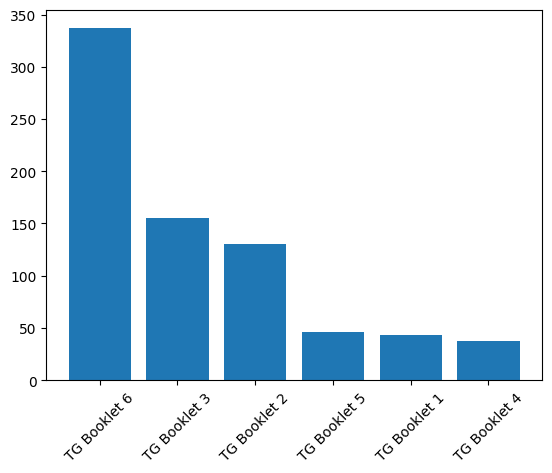

In [29]:
col = train_df["Reference Document"].value_counts()


fig, ax1 = plt.subplots()

# Show the plot
plt.bar(col.index, col.values)
ax1.set_xticklabels(col.index, rotation=45)


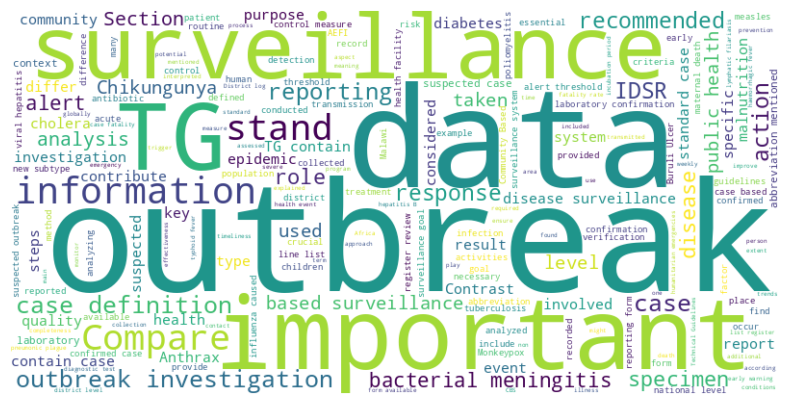

In [50]:
# prompt: generate word cloud for the question text column

from wordcloud import WordCloud

# Combine all the questions into a single string
all_questions = " ".join(train_df["Question Text"].tolist())

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_questions)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Model Tuning

In [30]:
from transformers import pipeline, AutoTokenizer, AutoModelForQuestionAnswering

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
pubmed = "microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext"



In [31]:
model = AutoModelForQuestionAnswering.from_pretrained(checkpoint)




config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
print(model)

DistilBertForQuestionAnswering(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
      

In [ ]:
# import bitsandbytes as bnb
# def find_all_linear_names(model):
#     lora_module_names = set()
#     for name, module in model.named_modules():
#         if isinstance(module, bnb.nn.StandardLinear):
#             names = name.split(".")
#             lora_module_names.add(names[0] if len(names) == 1 else names[-1])

#     if "lm_head" in lora_module_names:  # needed for 16-bit
#         lora_module_names.remove("lm_head")
#     return list(lora_module_names)

# find_all_linear_names(model)

In [33]:
from peft import LoraConfig, TaskType

peft_config = LoraConfig(task_type=TaskType.QUESTION_ANS,
                         inference_mode=True,
                         r=8,
                         lora_alpha=32,
                         lora_dropout=0.1,
                         target_modules=["q_lin","k_lin","v_lin"])

In [34]:
from peft import get_peft_model, prepare_model_for_kbit_training

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 1,538 || all params: 66,587,140 || trainable%: 0.0023097553071058465


In [35]:
import torch
from transformers import BitsAndBytesConfig

q_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
)

In [36]:
model = AutoModelForQuestionAnswering.from_pretrained(checkpoint, quantization_config=q_config)


Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
from transformers import Trainer, TrainingArguments

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

inputs = tokenizer(train_ds["Question Text"], padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1053,  2620, 24594,   102,     0],
        [  101,  1053,  2581, 17465,   102,     0],
        [  101,  1053, 21472,  2549,   102,     0],
        ...,
        [  101,  1053, 14526, 23632,   102,     0],
        [  101,  1053, 22394,  2487,   102,     0],
        [  101,  1053, 22025,  2475,   102,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        ...,
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0]])}


In [42]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/malawi/models/",
    learning_rate=1e-3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [44]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=tokenizer,
    # data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

NameError: name 'data_collator' is not defined

In [ ]:
model.save_pretrained("/content/drive/malawi/output_dir")

In [ ]:
from huggingface_hub import notebook_login

# notebook_login()
model.push_to_hub("mcarthuradal/malawi")